<a href="https://colab.research.google.com/github/kimheeseo/python/blob/main/p_121__136.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**수치 미분**

In [ ]:
import numpy as np
# 경사법에서는 기울기(경사) 값을 기준으로 나아갈 방향을 정합니다.
# 미분: 특정 순간의 변화량을 표시한 것.

# 나쁜 구현의 예
def numerical_diff(f,x):
  h=1e-50
  return (f(x+h)-f(x))/h

# h=1e-50
# 반올림 오차 문제를 일으킵니다. 반올림 오차는 작은 값이 생략되어 최종 계산 결과에 오차가 생기게 됩니다.
np.float32(1e-50)
# 너무 작은 값을 이용하면 컴퓨터로 계산하는 데 문제가 된다는 것이다. 이 미세한 값 h로 10^(-4)을 이용하면, 좋은 결과를 얻는다.

0.0

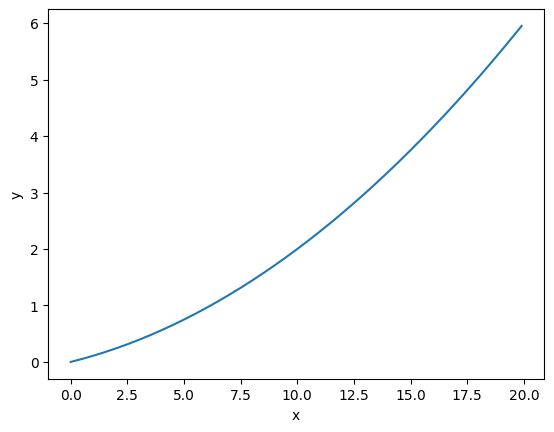

In [ ]:
# y=0.01x^2+0.1x

def function_1(x):
  return 0.01*x**2 + 0.1*x

import numpy as np
import matplotlib.pylab as plt

x=np.arange(0, 20, 0.1)
y=function_1(x)

plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,y)
plt.show()

In [ ]:
numerical_diff(function_1,5)

0.0

**편미분**

In [ ]:
def function_2(x):
  return x[0]**2+x[1]**2

# f(x0, x1)=(x0)^2+(x1)^2
# 인수x는 넘파이 배열이라고 가정합니다. 이 코드는 넘파이 배열의 각 원소를 제곱하고 그 합을 구할 뿐 간단한 구현.

In [ ]:
def function_tmp1(x0):
  return x0*x0+4.0**2.0

**기울기**

In [8]:
def numerical_gradient(f, x):
  h=1e-4
  grad=np.zeros_like(x) # np.zeros_like(x): 어떤 변수만큼의 사이즈인 0 으로 가득 찬 Array를 배출한다

  for idx in range(x.size):
    tmp_val=x[idx]
    x[idx]=tmp_val + h
    fxh1=f(x)

    x[idx]=tmp_val - h
    fxh2=f(x)

    grad[idx]=(fxh1-fxh2)/(2*h)
    x[idx]=tmp_val

  return grad

**경사법(경사하강법)**

In [ ]:
# 신경망 역시 최적의 매개변수를 학습 시에 찾아야 합니다. 최적이란 손실 함수가 최솟값이 될 때의 매개변수 값입니다.

# 함수가 극솟값, 최솟값 또 안장점(saddle point)이 되는 장소에서는 기울기가 0입니다.
# 1) 극소값: 국소적인 최소값, 즉 한정된 범위에서의 최솟값인 점입니다.

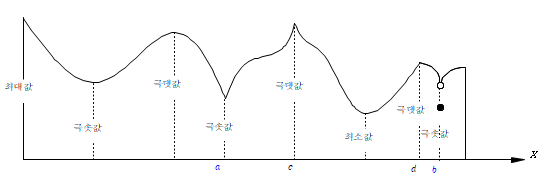

In [ ]:
# 2) 안장점: 어느 방향에서 보면 극댓값이고, 다른 방향에서 보면 극솟값이 되는 점입니다.
# 경사법은 기울기가 0인 장소를 찾지만 그것이 반드시 최솟값이라고는 할 수 없습니다.

# 복잡하고 찌그러진 모양의 함수라면 평평한 곳으로 파고들면서 고원(plateau)이라 하는, 학습이 진행되지 않는 정체기에 빠질 수 있습니다.

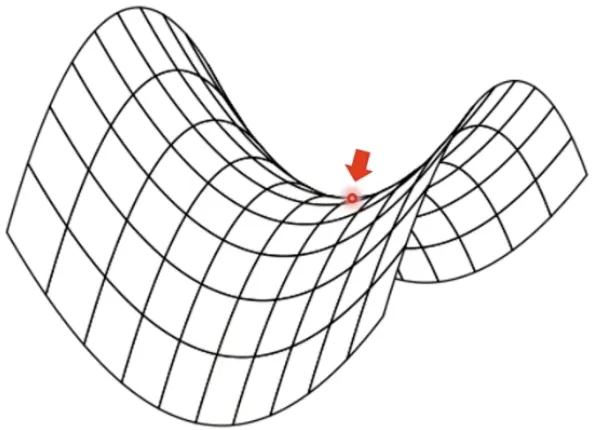

In [ ]:
# 기울어진 방향이 꼭 최솟값을 가리키는 것은 아니나, 그 방향으로 가야 함수의 값을 줄일 수 있습니다.
# 그래서 최솟값이 되는 장소를 찾는 문제에서는 기울기 정보를 단서로 나아갈 방향을 정해야 합니다.

# 경사법: 현 위치에서 기울어진 방향으로 일정 거리만큼 이동합니다. 그런 다음 이동한 곳에서도 마찬가지로 기울기를 구하고, 또 기울어진 방향으로 나아가기를 반복합니다.
# 이렇게 해서 함수의 값을 점차 줄이는 것이 경사법 입니다.(gradient method)

In [5]:
import numpy as np
def gradienct_descent(f, init_x, lr=0.01, step_num=100):
  x=init_x

  for i in range(step_num):
    grad=numerical_gradient(f,x) # 함수의 기울기: numerical_gradient(f,x)로 구한다.
    x-=lr*grad
  return x

In [6]:
def function_2(x):
  return x[0]**2+x[1]**2

init_x=np.array([-3.0, 4.0])
gradienct_descent(function_2, init_x=init_x, lr=0.1, step_num=1)

NameError: name 'numerical_gradient' is not defined

**학습률이 너무 큰 예: lr=10**

In [9]:
init_x=np.array([-3.0, 4.0])
gradienct_descent(function_2, init_x=init_x, lr=10, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

**학습률이 너무 작은 예:lr=1e-10**

In [10]:
init_x=np.array([-3.0, 4.0])
gradienct_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

# 학습률이 너무 크면 큰 값으로 발산해버립니다.
# 반대로 너무 작으면 거의 갱신되지 않은 채 끝나버린다.

# 하이퍼파라미터 : 사람이 직접 설정해야 하는 매개변수

array([-2.99999994,  3.99999992])

**신경망에서의 기울기**

In [35]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    if t.size == y.size:
        t = t.argmax(axis=1)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

def _numerical_gradient_1d(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)

        x[idx] = tmp_val - h
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)

        x[idx] = tmp_val # 値を元に戻す

    return grad

def numerical_gradient_2d(f, X):
    if X.ndim == 1:
        return _numerical_gradient_1d(f, X)
    else:
        grad = np.zeros_like(X)

        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_1d(f, x)

        return grad

def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)

    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x) # f(x+h)

        x[idx] = tmp_val - h
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)

        x[idx] = tmp_val
        it.iternext()

    return grad

def softmax(x):
    x = x - np.max(x, axis=-1, keepdims=True)
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

In [14]:
# 간단한 신경망
import sys, os
sys.path.append(os.pardir)
import numpy as np

class simpleNet:
  def __init__(self):
    self.w=np.random.randn(2,3) # 정규분포로 초기화

  def predict(self, x):
    return np.dot(x, self.w)

  def loss(self, x, t):
    z=self.predict(x)
    y=softmax(z)
    loss=cross_entropy_error(y,t)

    return loss

In [28]:
net=simpleNet()
print('net.w값(가중치 매개변수):\n', net.w)

net.w값(가중치 매개변수):
 [[ 1.17841195 -1.49861788  0.48156022]
 [-0.76733117  0.28081396  0.43212883]]


In [29]:
x=np.array([0.6, 0.9])
p=net.predict(x)
print('p값(예측값):',p)

p값(예측값): [ 0.01644911 -0.64643816  0.67785208]


In [30]:
# 3번째 요소인 2를 나타내는 값이 가장 크니까, 그 값의 인덱스 도출
np.argmax(p)

2

In [31]:
t=np.array([0,0,1]) # 정답 레이블: 인덱스 2의 값이 정답으로 설정
net.loss(x,t)

0.5778025904266132

In [37]:
# 기울기를 구해볼까요?
def f(W):
  return net.loss(x,t)

dW=numerical_gradient(f, net.w)
print(dW)

# numerical_gradient(f, x)의 인수 f는 함수, x는 함수 f의 인수.
# 그래서 net.w를 인수로 받아 손실함수를 계산하는 새로운 함수 f를 정의.
# 그리고 이 새로 정의한 함수를 numerical_gradient(f,x)에 넘깁니다.

[[ 0.17376846  0.08955352 -0.26332199]
 [ 0.26065269  0.13433028 -0.39498298]]


In [38]:
# +) 람다 기법
f=lambda w:net.loss(x,t)
dW=numerical_gradient(f, net.w)
print(dW)

[[ 0.17376846  0.08955352 -0.26332199]
 [ 0.26065269  0.13433028 -0.39498298]]


In [ ]:
# f를 net.loss(x,t)로 이름을 바꿨습니다.